# DONT EVEN STARTED

Matriz de diferenças finitas:
 22.0000	 8.0000	 17.0000	-28.0000	 38.0000	
 30.0000	 25.0000	-11.0000	 10.0000	 0.0000	
 55.0000	 14.0000	-1.0000	 0.0000	 0.0000	
 69.0000	 13.0000	 0.0000	 0.0000	 0.0000	
 82.0000	 0.0000	 0.0000	 0.0000	 0.0000	
|   0 |   1 |   2 |   3 |   4 |
|----:|----:|----:|----:|----:|
|  22 |   8 |  17 | -28 |  38 |
|  30 |  25 | -11 |  10 |   0 |
|  55 |  14 |  -1 |   0 |   0 |
|  69 |  13 |   0 |   0 |   0 |
|  82 |   0 |   0 |   0 |   0 |
A aproximacao encontrada para f(8.000000) = 55.0000


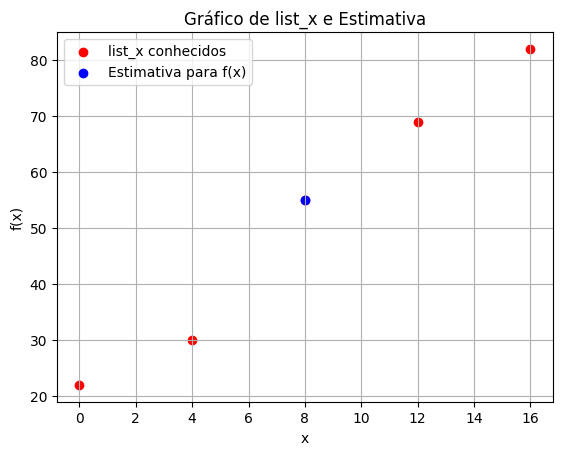

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def metodo_diferencas_finitas():

    # list_x e valores de f(x)
    list_x = [0,4, 8, 12, 16]
    list_y = [22,30,55,69,82]

    # Leitura do ponto a ser estimado
    x = 8  #Valor do tempo que foi passado na função

    # Quantidade de list_x
    quant_pontos = len(list_x)

    # Cálculo do espaçamento entre os list_x
    h = list_x[1] - list_x[0]

    # Inicialização da matriz para armazenar as diferenças finitas
    matriz_diferencas = [[0] * quant_pontos for _ in range(quant_pontos)]

    # Preenchimento da primeira coluna com os valores de f(x)
    for i in range(quant_pontos):
        matriz_diferencas[i][0] = list_y[i]

    # Cálculo das diferenças finitas
    for j in range(1, quant_pontos):
        for i in range(quant_pontos - j):
            matriz_diferencas[i][j] = matriz_diferencas[i +
                                                        1][j-1] - matriz_diferencas[i][j-1]

    # Impressão da matriz de diferenças finitas
    matrixxx = pd.DataFrame(matriz_diferencas)
    print(matrixxx.to_markdown(index=False))

    # Cálculo da estimativa utilizando a fórmula de diferenças finitas
    aprox = matriz_diferencas[0][0]
    termo = 1
    for j in range(1, quant_pontos):
        termo *= (x - list_x[j-1]) / (j * h)
        aprox += termo * matriz_diferencas[0][j]

    # Impressão da aproximação
    print('A aproximacao encontrada para f(%f) = %.4f' % (x, aprox))

    # Plotagem dos list_x e da estimativa
    plt.scatter(list_x, list_y, color='red', label='list_x conhecidos')
    plt.scatter(x, aprox, color='blue', label='Estimativa para f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gráfico de list_x e Estimativa')
    plt.legend()
    plt.grid(True)
    plt.show()


# Execução do método
if __name__ == "__main__":
    metodo_diferencas_finitas()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

csv_folder = "../csv/"
csv_name = "viagem"

dataframe = pd.read_csv(csv_folder+csv_name+".csv")

In [2]:
print(dataframe.columns.to_list())

column_x = "tempo"
column_y = "distancia"

['tempo', 'distancia']


In [3]:
print(dataframe)

# lista de elementos X
list_x = dataframe[column_x].to_list()
# lista de elementos Y
list_y = dataframe[column_y].to_list()

   tempo  distancia
0      0         20
1      8         12
2     20          6
3     25          4


${D_{i}}^n = \frac{{D_{yi + 1}}^{n-1} - {D_{yi}}^{n-1}}{Y_{i+N} - X_{i}}$ 